In [ ]:
import json
import pandas as pd
import string
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (TextVectorization, Embedding,
                                     Input, LSTM, Dropout, Dense)
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
data = pd.read_json('chatbot-intents-variasi-unik.json')
data

,intents
0,"{'tag': 'salam', 'patterns': ['Halo', 'Saya ma..."
1,"{'tag': 'nama', 'patterns': ['lu sape ?', 'nam..."
2,"{'tag': 'bye', 'patterns': ['Ceritakan tentang..."
3,"{'tag': 'konsultasi_dokter', 'patterns': ['Cer..."
4,"{'tag': 'pergerakan_bayi', 'patterns': ['Seber..."
5,"{'tag': 'kontraksi_palsu', 'patterns': ['Aku s..."
6,"{'tag': 'istirahat', 'patterns': ['Berapa bany..."
7,"{'tag': 'persalinan', 'patterns': ['Saya mau t..."
8,"{'tag': 'suplemen', 'patterns': ['Perlukah say..."
9,"{'tag': 'aktivitas_seksual', 'patterns': ['Apa..."


In [ ]:
text_input = []
intents = []
for intent in data['intents']:
    for pattern in intent['patterns']:
        text_input.append(pattern)
        intents.append(intent['tag'])

df = pd.DataFrame({'text_input': text_input, 'intents': intents})
df

,text_input,intents
0,Halo,salam
1,Saya mau tanya tentang salam,salam
2,Ceritakan tentang salam dong,salam
3,Hai,salam
4,Ping,salam
...,...,...
758,Gizi tambahan untuk ibu anemia apa aja?,makanan_tambahan_kek_anemia
759,Apa aja yang perlu diketahui tentang makanan?,makanan_tambahan_kek_anemia
760,Suplemen atau makanan tambahan KEK?,makanan_tambahan_kek_anemia
761,Makanan tambahan untuk ibu hamil KEK apa saja?,makanan_tambahan_kek_anemia


In [ ]:
df['intents'].value_counts()

,count
intents,
deteksi_keluhan,20
rekomendasi_nutrisi,20
salam,15
trimester_ketiga,15
postpartum,15
istirahat,15
suplemen,15
imunisasi,15
aktivitas_seksual,15


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def clean_and_stem(text):
    text = text.lower()
    text = ''.join(ch for ch in text if ch not in string.punctuation)
    text = stemmer.stem(text)
    return text
df['text_input'] = df['text_input'].apply(clean_and_stem)

In [ ]:
df

,text_input,intents
0,halo,salam
1,saya mau tanya tentang salam,salam
2,cerita tentang salam dong,salam
3,hai,salam
4,ping,salam
...,...,...
758,gizi tambah untuk ibu anemia apa aja,makanan_tambahan_kek_anemia
759,apa aja yang perlu tahu tentang makan,makanan_tambahan_kek_anemia
760,suplemen atau makan tambah kek,makanan_tambahan_kek_anemia
761,makan tambah untuk ibu hamil kek apa saja,makanan_tambahan_kek_anemia


In [ ]:
le = LabelEncoder()
df['encoded'] = le.fit_transform(df['intents'])
y_encoded = df['encoded'].values
y_onehot = to_categorical(y_encoded)

In [ ]:
# Text vectorization
max_vocab = 429
max_len = 10
vectorizer = TextVectorization(
    max_tokens=max_vocab,
    output_sequence_length=max_len,
    standardize='lower_and_strip_punctuation',
    split='whitespace'
)
vectorizer.adapt(df['text_input'])

In [ ]:
embedding = Embedding(input_dim=max_vocab, output_dim=128, input_length=max_len)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


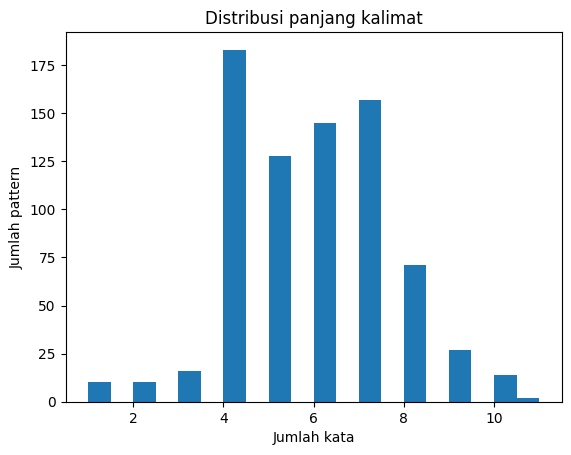

Rata-rata: 5.76, Maksimal: 11, 90 persentil: 8.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

lengths = [len(pattern.split()) for pattern in df['text_input']]
plt.hist(lengths, bins=20)
plt.title("Distribusi panjang kalimat")
plt.xlabel("Jumlah kata")
plt.ylabel("Jumlah pattern")
plt.show()

print(f"Rata-rata: {np.mean(lengths):.2f}, Maksimal: {np.max(lengths)}, 90 persentil: {np.percentile(lengths, 90)}")


In [ ]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D,Activation,  BatchNormalization, concatenate

inputs = Input(shape=(1,), dtype='string')
x = vectorizer(inputs)
x = embedding(x)
x = Conv1D(258, kernel_size=3)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = GlobalMaxPooling1D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(y_onehot.shape[1], activation='softmax')(x)


# COba multi kernel

# inputs = Input(shape=(1,), dtype='string')
# x = vectorizer(inputs)
# x = embedding(x)

# # Multi-filter CNN
# x1 = Conv1D(256, 3)(x)
# x1 = BatchNormalization()(x1)
# x1 = Activation('relu')(x1)
# x1 = GlobalMaxPooling1D()(x1)

# x2 = Conv1D(256, 4)(x)
# x2 = BatchNormalization()(x2)
# x2 = Activation('relu')(x2)
# x2 = GlobalMaxPooling1D()(x2)

# x3 = Conv1D(256, 5)(x)
# x3 = BatchNormalization()(x3)
# x3 = Activation('relu')(x3)
# x3 = GlobalMaxPooling1D()(x3)

# # Gabungkan hasil filter
# x = concatenate([x1, x2, x3])
# x = Dropout(0.5)(x)
# x = Dense(128, activation='relu')(x)
# outputs = Dense(y_onehot.shape[1], activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.layers import TextVectorization

max_vocab_length = 439
max_length = 8

text_vectorization = TextVectorization(max_tokens=max_vocab_length,
                                       standardize='lower_and_strip_punctuation',
                                       split='whitespace',
                                       ngrams=None,
                                       output_mode='int',
                                       output_sequence_length=max_length
                                       )

In [ ]:
# Penanganan data tidak seimbang
class_weights_arr = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_encoded),
    y=y_encoded
)
class_weights = {i: w for i, w in zip(np.unique(y_encoded), class_weights_arr)}


In [ ]:
X_train_text, X_val_text, y_train_tensor, y_val_tensor = train_test_split(
    df['text_input'].values, y_onehot, test_size=0.1, stratify=y_onehot, random_state=42)

X_train = tf.convert_to_tensor(X_train_text.reshape(-1, 1), dtype=tf.string)
X_val = tf.convert_to_tensor(X_val_text.reshape(-1, 1), dtype=tf.string)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train_tensor,
    validation_data=(X_val, y_val_tensor),
    epochs=200,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights
)

Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.0343 - loss: 4.2964 - val_accuracy: 0.0260 - val_loss: 3.9278
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1039 - loss: 3.6532 - val_accuracy: 0.1299 - val_loss: 3.9133
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2350 - loss: 3.2372 - val_accuracy: 0.2727 - val_loss: 3.8624
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4250 - loss: 2.4349 - val_accuracy: 0.4545 - val_loss: 3.7833
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5870 - loss: 1.7308 - val_accuracy: 0.4935 - val_loss: 3.6917
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7026 - loss: 1.1906 - val_accuracy: 0.5974 - val_loss: 3.5829
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7322 - loss: 0.9348 - val_accuracy: 0.5974 - val_loss: 3.4770
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7721 - loss: 0.7792 - val_accuracy: 0.

In [ ]:
import pickle
le_filename = open("label_encoder.pickle", "wb")
pickle.dump(le, le_filename)
le_filename.close()

In [ ]:
model.save("model.keras")

# Interface

In [ ]:
# import library
import json
from string import punctuation
import random
import pickle
from tensorflow.keras.models import load_model
import pandas as pd

data = pd.read_json('chatbot-intents-variasi-unik.json')

model = load_model('model.keras')
le_filename = open("label_encoder.pickle", "rb")
le = pickle.load(le_filename)
le_filename.close()

def preprocess_string(string):
    string = string.lower()
    exclude = set(punctuation)
    string = ''.join(ch for ch in string if ch not in exclude)
    string = stemmer.stem(string)
    return string

def chat(model):
    print("Anda akan dihubungkan ke bot kami, mohon ditunggu")
    exit = False
    while not exit:
        inp = input("Anda : ")
        inp_clean = preprocess_string(inp)

        # Convert ke tensor string dengan shape (1,1)
        inp_tensor = tf.convert_to_tensor([[inp_clean]], dtype=tf.string)

        prob = model.predict(inp_tensor)
        results = le.classes_[prob.argmax()]

        if prob.max() < 0.1:
            print("Bot : Maaf kak, untuk pertanyaan tersebut baiknya ditanyakan langsung ke Dokter Spesialis.")
        else:
            for tg in data['intents']:
                if tg['tag'] == results:
                    responses = tg['responses']
            if results == 'bye':
                exit = True
                print("END CHAT")
            print(f"Bot : {random.choice(responses)}")


In [ ]:
if __name__ == "__main__":
    chat(model)

Anda akan dihubungkan ke bot kami, mohon ditunggu
Anda : halo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Bot : Halo!
Anda : apa tanda KEK pada ibu hamil
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Bot : Ciri ibu hamil KEK antara lain LILA di bawah 23,5 cm, tubuh tampak kurus, dan kelelahan berlebihan. Kondisi ini memerlukan intervensi gizi segera.
Anda : apa akibat dari ibu hamil KEK
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Bot : Ibu hamil dengan KEK berisiko mengalami anemia, persalinan prematur, dan komplikasi saat melahirkan.
Anda : Gizi yang dibutuhkan ibu seperti apa
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Bot : Ibu hamil membutuhkan gizi seimbang yang mencakup karbohidrat, protein, lemak sehat, vitamin, dan mineral seperti zat besi, asam folat, dan kalsium.
Anda : bagaimana mencegah stunting
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Bot : Menjaga kebersihan lingkungan, akses air bersih, serta pemantauan pertumbuhan anak secara rutin juga penting untuk mencegah stunting.
Anda : ok
1/1 ━━━━━━━━━━━━━━